In [1]:
from random_search import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns#
import math
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

## Load and prepare data

In [2]:
df = pd.read_csv('data/framingham.csv')
df = df.dropna()

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Train-test split

In [4]:
df_train = df.sample(frac=0.8)
df_valid = df.drop(df_train.index)

In [5]:
X_train = df_train[['male', 'age', 'education', 'currentSmoker',
                    'cigsPerDay', 'BPMeds', 'prevalentStroke',
                    'prevalentHyp', 'diabetes', 'totChol', 
                    'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
                   ]].to_numpy()
y_train = df_train['TenYearCHD'].to_numpy()

X_valid = df_valid[['male', 'age', 'education', 'currentSmoker',
                    'cigsPerDay', 'BPMeds', 'prevalentStroke',
                    'prevalentHyp', 'diabetes', 'totChol', 
                    'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
                   ]].to_numpy()
y_valid = df_valid['TenYearCHD'].to_numpy()

In [6]:
X_train = np.c_[np.ones((y_train.shape[0], 1)), X_train]
X_valid = np.c_[np.ones((y_valid.shape[0], 1)), X_valid]

In [7]:
X_train.shape

(2925, 16)

### Basic experiment

In [8]:
epochs = 30

In [9]:
w1, losses1, valid_losses1 = random_search(epochs, X_train, y_train, X_valid, y_valid, gamma=0.00001, m=0.0001, loss=log_loss)

loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.44927252555338026
valid_loss = 0.45284413217148795
loss_w = 0.442922004848759
valid_loss = 0.4467076217440467


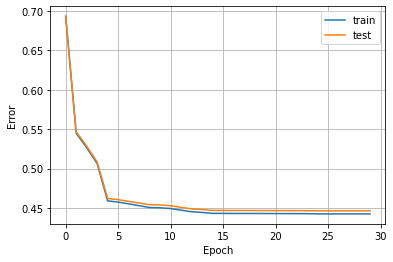

In [10]:
plt.plot(list(range(30)), losses1, label = 'train')
plt.plot(list(range(30)), valid_losses1, label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.legend()
#plt.savefig('figs/zo_classification')

### Parameter m - tuning

In [11]:
m_vals = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

In [12]:
loss_list = []
valid_loss_list = []

for m in m_vals:
    print('m = {}'.format(m))
    w, losses, valid_losses = random_search(30, X_train, y_train, X_valid, y_valid, 1e-5, m, log_loss)
    loss_list.append(losses)
    valid_loss_list.append(valid_losses)
    print('-------------------------')

m = 0.1
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.48205364323055855
valid_loss = 0.48955723093103687
loss_w = 0.8503099174956511
valid_loss = 0.8600196882134002
-------------------------
m = 0.01
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.44798054423733336
valid_loss = 0.4528065572249639
loss_w = 0.5282554084901072
valid_loss = 0.5335980436338639
-------------------------
m = 0.001
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.45189125412202175
valid_loss = 0.45545780986163537
loss_w = 0.44311666355019835
valid_loss = 0.44694457509777846
-------------------------
m = 0.0001
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.44927252555338026
valid_loss = 0.45284413217148795
loss_w = 0.442922004848759
valid_loss = 0.4467076217440467
-------------------------
m = 1e-05
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.44897198963880225
valid_loss = 0.4525474315060961

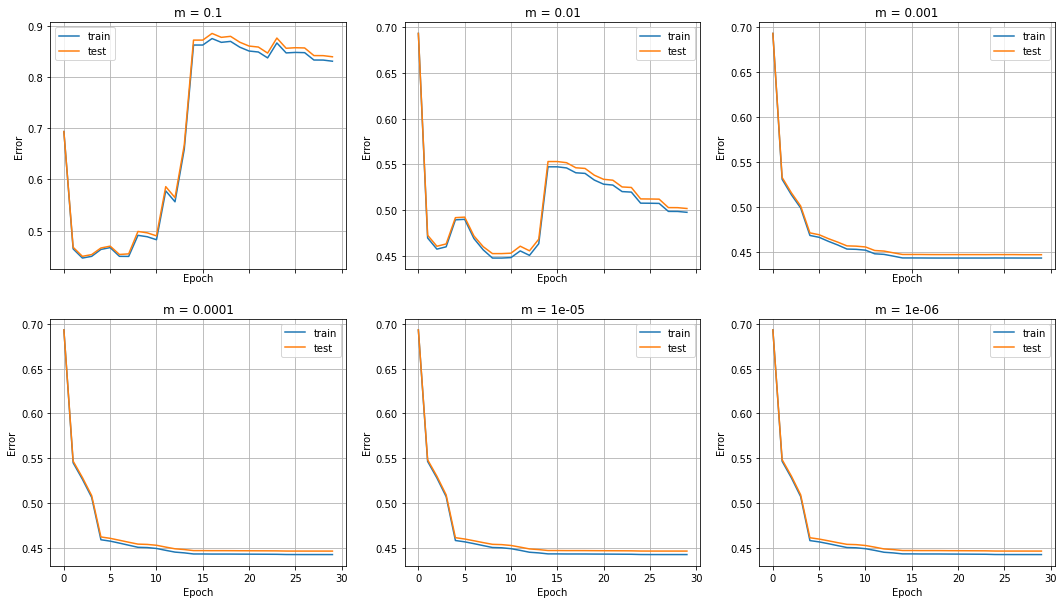

In [13]:
fig, axs = plt.subplots(2,3,sharey=False, sharex=True, figsize=(18,10))

for i in range(len(axs)):
    for j in range(len(axs[0])):
        n = i+j+2*i
        axs[i,j].plot(list(range(30)), loss_list[n], label = 'train')
        axs[i,j].plot(list(range(30)), valid_loss_list[n], label = 'test')
        axs[i,j].set_xlabel('Epoch')
        axs[i,j].set_ylabel('Error')
        axs[i,j].set_title('m = {}'.format(m_vals[n]))
        axs[i,j].grid()
        axs[i,j].legend()
        
#plt.savefig('figs/m_tuning')

In [15]:
for i in range(len(m_vals)):
    print('m = {}'.format(m_vals[i]))
    print('test error = {}'.format(valid_loss_list[i][-1]))

m = 0.1
test error = 0.8608846367858282
m = 0.01
test error = 0.5134334899854723
m = 0.001
test error = 0.4529229071217992
m = 0.0001
test error = 0.45211098433474917
m = 1e-05
test error = 0.45203081946418994
m = 1e-06
test error = 0.45202279780153776


In [16]:
final_losses = [valid_loss_list[i][-1] for i in range(len(m_vals))]
best_error = np.min(final_losses)
best_error_ind = np.where(final_losses == best_error)
best_m = m_vals[best_error_ind[0][0]]
best_m

1e-06

Try more epochs with m=0.1:

In [17]:
w, losses, valid_losses = random_search(300, X_train, y_train, X_valid, y_valid, 1e-5, m_vals[0], log_loss)

loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.48160077625561143
valid_loss = 0.49368752551342315
loss_w = 0.8479304548004948
valid_loss = 0.8803536123738706
loss_w = 1.1407027121454985
valid_loss = 1.1891206724244485
loss_w = 1.031756454202564
valid_loss = 1.0746365295742732
loss_w = 1.0984917121201079
valid_loss = 1.1481480953569905
loss_w = 1.7437753991409881
valid_loss = 1.8232647119557739
loss_w = 2.1795477189887937
valid_loss = 2.28216929583965
loss_w = 2.5113620214074404
valid_loss = 2.6281693046326318
loss_w = 2.4915628677463686
valid_loss = 2.6072870988117605
loss_w = 2.4369991120743615
valid_loss = 2.5506676793852376
loss_w = 2.519399734171294
valid_loss = 2.6365259560257535
loss_w = 2.7084887542253977
valid_loss = 2.8347795075097353
loss_w = 2.863661315853814
valid_loss = 2.99642070423812
loss_w = 3.1064246096053663
valid_loss = 3.2496118233634563
loss_w = 3.33326443335225
valid_loss = 3.487534101998017
loss_w = 3.427894783116423
valid_loss = 3.585301

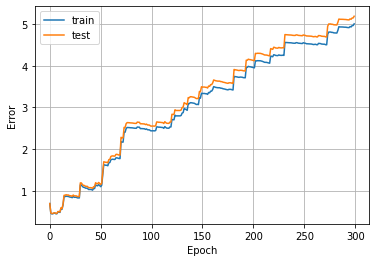

In [18]:
plt.plot(list(range(300)), losses, label = 'train')
plt.plot(list(range(300)), valid_losses, label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.legend()

Try more epochs with m=0.01:

In [19]:
w, losses, valid_losses = random_search(300, X_train, y_train, X_valid, y_valid, 1e-5, m_vals[1], log_loss)

loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.44710755528138973
valid_loss = 0.45588600658691925
loss_w = 0.5261608806103079
valid_loss = 0.5455508025936248
loss_w = 0.7975301975977
valid_loss = 0.8327443355115678
loss_w = 0.633637581194769
valid_loss = 0.6600096228830419
loss_w = 0.5316443051593478
valid_loss = 0.5539499340801134
loss_w = 0.6714140243655553
valid_loss = 0.7010237667039773
loss_w = 1.2055736775408354
valid_loss = 1.2621957521213127
loss_w = 1.0619146221398146
valid_loss = 1.1119635946212003
loss_w = 0.840663191460307
valid_loss = 0.880211081470981
loss_w = 0.6906401454715482
valid_loss = 0.7237614595023844
loss_w = 0.6539982130393932
valid_loss = 0.6851559589039755
loss_w = 0.5970212944174242
valid_loss = 0.6253714853432042
loss_w = 0.5787531812768852
valid_loss = 0.6058743782279491
loss_w = 0.564442448238361
valid_loss = 0.590741773174096
loss_w = 0.586851537747702
valid_loss = 0.6149707463222608
loss_w = 0.5599359091700734
valid_loss = 0.5866

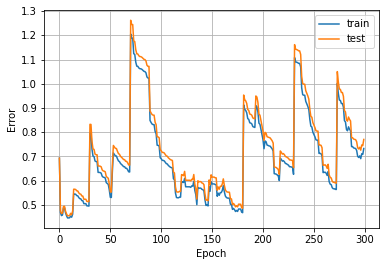

In [21]:
plt.plot(list(range(300)), losses, label = 'train')
plt.plot(list(range(300)), valid_losses, label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.legend()

#### Plots for m

In [22]:
m_vals = [0.1, best_m, 1e-20]

In [23]:
loss_list = []
valid_loss_list = []

for m in m_vals:
    print('m = {}'.format(m))
    w, losses, valid_losses = random_search(30, X_train, y_train, X_valid, y_valid, 1e-5, m, log_loss)
    loss_list.append(losses)
    valid_loss_list.append(valid_losses)
    print('-------------------------')

m = 0.1
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.48160077625561143
valid_loss = 0.49368752551342315
loss_w = 0.8479304548004948
valid_loss = 0.8803536123738706
-------------------------
m = 1e-06
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.44765893565031484
valid_loss = 0.45697331526041723
loss_w = 0.4413710069885429
valid_loss = 0.45232620659464173
-------------------------
m = 1e-20
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
-------------------------


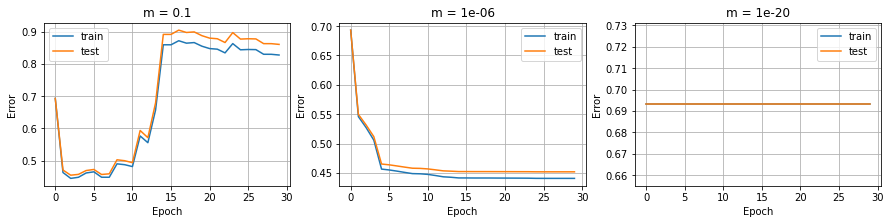

In [25]:
fig, axs = plt.subplots(1,3,sharey=False, sharex=True, figsize=(15,3))

for i in range(len(axs)):
    axs[i].plot(list(range(30)), loss_list[i], label = 'train')
    axs[i].plot(list(range(30)), valid_loss_list[i], label = 'test')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Error')
    axs[i].set_title('m = {}'.format(m_vals[i]))
    axs[i].grid()
    axs[i].legend()
    
plt.savefig('figs/m_examples')

## SGD

In [14]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [15]:
model = SGDClassifier(loss = 'log', verbose=2, fit_intercept = True, learning_rate = 'constant', eta0 = 1e-5)#, max_iter=1000)

In [16]:
model.fit(X_train, y_train)

-- Epoch 1
Norm: 0.03, NNZs: 16, Bias: -0.000367, T: 2925, Avg. loss: 0.474351
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 16, Bias: -0.000626, T: 5850, Avg. loss: 0.461767
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 16, Bias: -0.000918, T: 8775, Avg. loss: 0.453042
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 16, Bias: -0.001166, T: 11700, Avg. loss: 0.458623
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 16, Bias: -0.001412, T: 14625, Avg. loss: 0.452946
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 16, Bias: -0.001675, T: 17550, Avg. loss: 0.451976
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.06, NNZs: 16, Bias: -0.001890, T: 20475, Avg. loss: 0.452556
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.07, NNZs: 16, Bias: -0.002147, T: 23400, Avg. loss: 0.446556
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.07, NNZs: 16, Bias: -0.002379, T: 26325, Avg. loss: 0.445859
Tot

SGDClassifier(eta0=1e-05, learning_rate='constant', loss='log', verbose=2)

In [17]:
w = model.coef_

pred_tr = sigmoid(X_train.dot(w.T))
sgd_loss_tr = log_loss(y_train, pred_tr)
print('training loss with SGD optimizer: {}'.format(sgd_loss_tr))
print('training loss with zero-order optimizer: {}'.format(losses1[-1]))

pred = sigmoid(X_valid.dot(w.T))
sgd_loss_valid = log_loss(y_valid, pred)
print('test loss with SGD optimizer: {}'.format(sgd_loss_valid))
print('test loss with zero-order optimizer: {}'.format(valid_losses1[-1]))

training loss with SGD optimizer: 0.4290655502275413
training loss with zero-order optimizer: 0.44247102109292497
test loss with SGD optimizer: 0.4383425627738987
test loss with zero-order optimizer: 0.44634154365366857


In [ ]:
1e-2

In [ ]:
10**(-2)